This notebook uses the access library to calculate and plot spatial access metrics for one town in Brazil. 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from access import Access, weights, Datasets
# Transforming dataset into geopandas data
import geopandas as gpd
from shapely import wkt



In [2]:
# Importing data
school_census_df = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/school_census.csv",index_col=0)
dem_census_df = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/dem_census.csv", index_col=0)

/var/folders/v6/m0s_jr6d723809xzpzrvx_340000gn/T/ipykernel_78263/1079503947.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dem_census_df = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/dem_census.csv", index_col=0)


In [3]:
#Turn into geopandas

# This is a helpe function to make grometries work
def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None
dem_census_df["geometry"] = dem_census_df['geometry'].apply(wkt_loads)
school_census_df["geometry"] = school_census_df['geometry'].apply(wkt_loads)

geo_dem_census_df = gpd.GeoDataFrame(dem_census_df, crs = "EPSG:4674", geometry = 'geometry')
geo_school_census_df = gpd.GeoDataFrame(school_census_df, crs = "EPSG:4674", geometry = 'geometry')
#

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [4]:

# Removing the schools and census tracts that we don't have the location of
geo_dem_census_df = geo_dem_census_df[~geo_dem_census_df.geometry.is_empty]
geo_school_census_df = geo_school_census_df[~geo_school_census_df.geometry.is_empty]
geo_dem_census_df = geo_dem_census_df[~geo_dem_census_df.geometry.isna()]
geo_school_census_df = geo_school_census_df[~geo_school_census_df.geometry.isna()]

geo_school_census_df.head()

,region_name,region_id,state_name,state_abbrev,state_id,city_name,city_id,mesoregion_name,mesoregion_id,microregion_name,...,address,address_number,address_complement,neighborhood,zip_code,n_students,n_teachers,n_classes,sigla_uf,geometry
1,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,AVENIDA RIO DE JANEIRO,4776,ESCOLA,CIDADE ALTA,76954000.0,0.0,0.0,0.0,RO,POINT (-61.98651 -11.93096)
2,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,LINHA 60 COM A 140,NaN,NaN,NaN,76954000.0,0.0,0.0,0.0,RO,POINT (-62.17758 -12.04284)
3,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,ROLIM DE MOURA DO GUAPORE,NaN,NaN,NaN,76954000.0,0.0,0.0,0.0,RO,POINT (-62.27693 -13.08367)
7,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,LINHA P 50 KM 22,NaN,NaN,NaN,76954000.0,0.0,0.0,0.0,RO,POINT (-61.99335 -12.12982)
8,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,AVENIDA MATO GROSSO,3861,NaN,CENTRO,76954000.0,264.0,39.0,27.0,RO,POINT (-61.99506 -11.92733)


In [5]:
# Projecting into the same geometry

# https://epsg.io/5880 
# The units are in meters which facilitates the interpretation of distance
geo_dem_census_df = geo_dem_census_df.to_crs(epsg = 5641)
geo_school_census_df = geo_school_census_df.to_crs(epsg = 5641)


/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


In [6]:
geo_school_census_df.isna().sum()

region_name              726
region_id                726
state_name               726
state_abbrev             726
state_id                 726
city_name                726
city_id                  726
mesoregion_name          726
mesoregion_id            726
microregion_name         726
microregion_id           726
sector_id                726
school_id                  0
school_name              726
admin_type               726
location_type            726
address                 1815
address_number         26569
address_complement    100099
neighborhood           16180
zip_code                1814
n_students             10479
n_teachers             10856
n_classes              10479
sigla_uf                   0
geometry                   0
dtype: int64

In [7]:
print(geo_dem_census_df.columns)
print(geo_school_census_df.columns)

Index(['sector_id', 'state', 'n_households', 'n_people',
       'avg_monthly_earnings', 'n_people_15to17_white',
       'n_people_15to17_black', 'n_people_15to17_asian',
       'n_people_15to17_parda', 'n_people_15to17_indigenous', 'n_people_15',
       'n_people_16', 'n_people_17', 'n_people_15_men', 'n_people_16_men',
       'n_people_17_men', 'n_people_15_women', 'n_people_16_women',
       'n_people_17_women', 'n_people_15to17', 'n_people_15to17_alternative',
       'state_id', 'state_abbrev', 'city_id', 'city_name', 'district_id',
       'district_name', 'subdistrict_id', 'subdistrict_name',
       'neighborhood_name', 'neighborhood_id', 'zone', 'geometry'],
      dtype='object')
Index(['region_name', 'region_id', 'state_name', 'state_abbrev', 'state_id',
       'city_name', 'city_id', 'mesoregion_name', 'mesoregion_id',
       'microregion_name', 'microregion_id', 'sector_id', 'school_id',
       'school_name', 'admin_type', 'location_type', 'address',
       'address_number', 'a

In [11]:
# Only public schools with at least one high school class and regions with at least one high-school aged person
geo_dem_census_df = geo_dem_census_df[geo_dem_census_df["n_people_15to17"] > 0]
geo_school_census_df = geo_school_census_df[(geo_school_census_df["n_classes"] > 0) & (geo_school_census_df["admin_type"] != 4.0)]

In [12]:
# HERE WE ARE GONNA HAVE TO CHUNK THE CALCULATION OF THE DISTANCES BECAUSE THE RESULTING MATRIX IS TOO BIG
# WE ARE GONNA HAVE TO DO IT BY XXX

301539 18477


In [13]:
# import tqdm
from tqdm import tqdm

In [27]:
geo_school_census_df.head()

,region_name,region_id,state_name,state_abbrev,state_id,city_name,city_id,mesoregion_name,mesoregion_id,microregion_name,...,address,address_number,address_complement,neighborhood,zip_code,n_students,n_teachers,n_classes,sigla_uf,geometry
8,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,AVENIDA MATO GROSSO,3861,NaN,CENTRO,76954000.0,264.0,39.0,27.0,RO,POINT (2886759.309 8672190.023)
12,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,AVENIDA AMAPA,4503,NaN,SANTA FELICIDADE,76954000.0,175.0,15.0,6.0,RO,POINT (2887396.839 8672498.304)
27,Norte,1.0,Rondônia,RO,11.0,Alta Floresta D'Oeste,1100015.0,Leste Rondoniense,1102.0,Cacoal,...,RUA NEREU RAMOS,4581,NaN,REDONDO,76954000.0,310.0,19.0,12.0,RO,POINT (2885894.346 8671383.156)
51,Norte,1.0,Rondônia,RO,11.0,Ariquemes,1100023.0,Leste Rondoniense,1102.0,Ariquemes,...,AVENIDA GUAPORE,3087,NaN,SETOR 05,76870575.0,302.0,27.0,11.0,RO,POINT (2770728.999 8900539.327)
54,Norte,1.0,Rondônia,RO,11.0,Ariquemes,1100023.0,Leste Rondoniense,1102.0,Ariquemes,...,RUA CARDEAL,1394,NaN,SETOR 02,76873110.0,718.0,34.0,24.0,RO,POINT (2772211.734 8898322.723)


In [30]:
dist_matrix = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/dist_matrix.csv", index_col=0)
dist_matrix.head()

,origin,dest,euclidean
0,170025105000002,17010535,13894.563390
1,170320605000005,17014298,16119.745299
2,170390905000005,17011736,12566.395935
3,170600105000005,17011787,17742.292778
4,170600105000005,17014298,18544.963646


In [31]:
A = Access(
    demand_df=geo_dem_census_df,
    demand_index="sector_id",
    demand_value="n_people_15to17",
    supply_df=geo_school_census_df,
    supply_index="school_id",
    supply_value="n_teachers",
    cost_df=dist_matrix,
    cost_origin="origin",
    cost_dest="dest",
    cost_name="euclidean"
    )

In [29]:
A.demand_df.head()

,state,n_households,n_people,avg_monthly_earnings,n_people_15to17_white,n_people_15to17_black,n_people_15to17_asian,n_people_15to17_parda,n_people_15to17_indigenous,n_people_15,...,city_id,city_name,district_id,district_name,subdistrict_id,subdistrict_name,neighborhood_name,neighborhood_id,zone,geometry
sector_id,,,,,,,,,,,,,,,,,,,,,
170025105000002,TO,115.0,300.0,648.06,1.0,0.0,0.0,10.0,0.0,6.0,...,1700251.0,Abreulândia,170025105.0,Abreulândia,1.700251e+10,NaN,NaN,NaN,2.0,"POLYGON ((4316081.044 8936951.569, 4316439.062..."
170030105000001,TO,286.0,1123.0,927.45,10.0,2.0,3.0,59.0,0.0,26.0,...,1700301.0,Aguiarnópolis,170030105.0,Aguiarnópolis,1.700301e+10,NaN,NaN,NaN,1.0,"POLYGON ((4501590.424 9273374.768, 4503952.106..."
170030105000002,TO,294.0,1101.0,478.33,11.0,0.0,1.0,46.0,0.0,23.0,...,1700301.0,Aguiarnópolis,170030105.0,Aguiarnópolis,1.700301e+10,NaN,NaN,NaN,1.0,"POLYGON ((4503050.051 9272734.519, 4503294.923..."
170030105000003,TO,102.0,385.0,453.32,3.0,1.0,0.0,17.0,0.0,8.0,...,1700301.0,Aguiarnópolis,170030105.0,Aguiarnópolis,1.700301e+10,NaN,NaN,NaN,2.0,"POLYGON ((4502995.960 9275774.210, 4503071.882..."
170030105000004,TO,56.0,245.0,368.55,3.0,0.0,0.0,11.0,0.0,6.0,...,1700301.0,Aguiarnópolis,170030105.0,Aguiarnópolis,1.700301e+10,NaN,NaN,NaN,2.0,"POLYGON ((4498921.648 9273403.237, 4499348.144..."


In [25]:
A.cost_df

,origin,dest,euclidean,W3
0,218894,23847,1024.402633,0.985531
1,268694,23847,704.300224,0.993134
2,2,23853,1524.518606,0.968235
3,3,23853,1450.603219,0.971197
4,4,23853,9231.038217,0.306205
...,...,...,...,...
7072904,246435,80698,543.300260,0.995909
7072905,246436,80698,2370.210438,0.924940
7072906,259006,80698,1827.861679,0.954656
7072907,268986,80698,4105.187845,0.791312


In [32]:
# Defining custom weight functions
fn30 = weights.step_fn({0: 1, 5000: 0.68, 10000: 0.22, 15000: 0.05})
gaussian = weights.gaussian(6000)   

# Access metrics to calculate
max_cost = 16000
A.enhanced_two_stage_fca(name="2sfca30", weight_fn=fn30, cost = "euclidean")
# A.enhanced_two_stage_fca(name="g2sfca", weight_fn=gaussian, max_cost=16000)
# A.three_stage_fca(name = "3sfca", weight_fn=gaussian, max_cost = 16000)

,2sfca30_n_teachers
sector_id,
110001505000001,0.080041
110001505000002,0.080041
110001505000003,0.080041
110001505000004,0.080041
110001505000005,0.080041
...,...
530010805300152,0.000000
530010805300153,0.000440
530010805300154,0.000440


In [38]:
il_map = geo_dem_census_df[["sector_id", "city_name", "n_people_15to17", "geometry"]].set_index("sector_id").join(A.norm_access_df, how="inner")

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


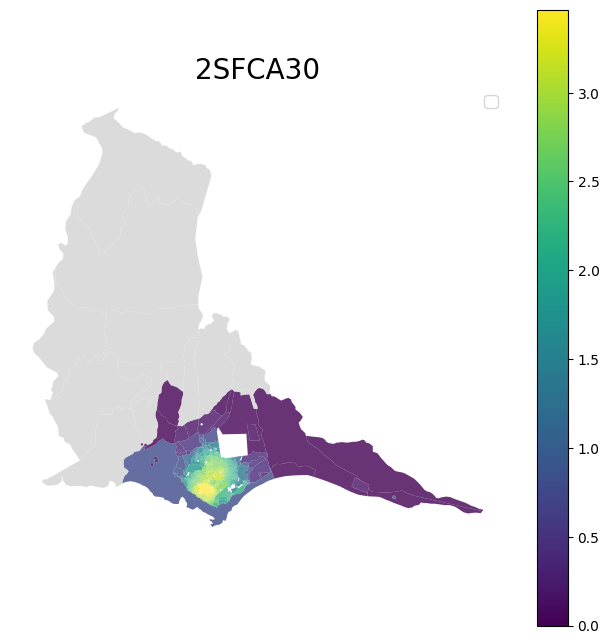

In [44]:
plot("2sfca30_n_teachers", il_map[il_map["city_name"] == "Manaus"], "2sfca30_n_teachers")

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: 

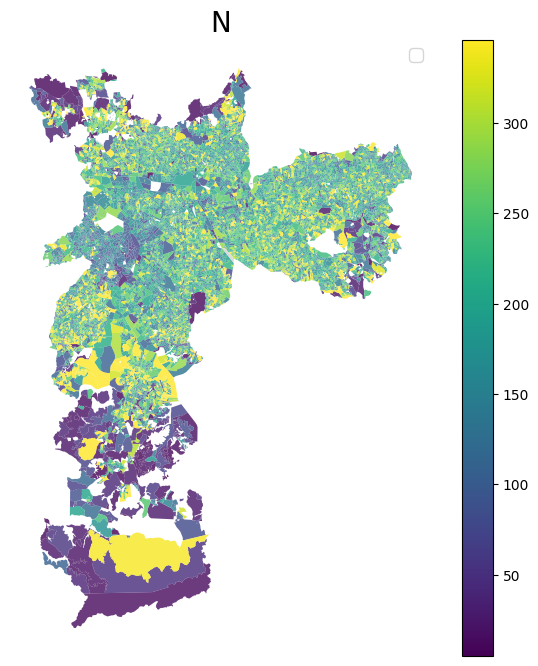

In [41]:
plot("n_households", geo_dem_census_df[geo_dem_census_df["city_name"] == "São Paulo"])

In [23]:
A.access_df.isna().sum()

n_people_15to17            0
2sfca30_n_teachers    301539
g2sfca_n_teachers     301539
3sfca_n_teachers      301539
dtype: int64

In [35]:
def make_access_map(city_name):
    subset_dem = geo_dem_census_df[geo_dem_census_df["city_name"] == city_name]
    subset_school = geo_school_census_df[geo_school_census_df["city_name"] == city_name]
    # Creating access object
    A = Access(
    demand_df=subset_dem,
    demand_index="sector_id",
    demand_value="n_people_15to17",
    supply_df=subset_school,
    supply_index="school_id",
    supply_value="n_teachers"
    )

    # Creating euclidean distance
    A.create_euclidean_distance(threshold=10000, centroid_o=True, centroid_d=True)

    # Defining custom weight functions
    fn30 = weights.step_fn({0: 1, 5000: 0.68, 10000: 0.22, 15000: 0.05})
    gaussian = weights.gaussian(6000)   

    # Access metrics to calculate
    max_cost = 16000
    A.enhanced_two_stage_fca(name="2sfca30", weight_fn=fn30, max_cost=16000)
    A.enhanced_two_stage_fca(name="g2sfca", weight_fn=gaussian, max_cost=16000)
    A.three_stage_fca(name = "3sfca", weight_fn=gaussian, max_cost = 16000)


    il_map = subset_dem[["sector_id", "n_people_15to17", "geometry"]].set_index("sector_id").join(A.norm_access_df, how="inner")

    #plot("2sfca_n_teachers", il_map, subset_school)
    plot("2sfca30_n_teachers", il_map, subset_school)
    plot("g2sfca_n_teachers", il_map, subset_school)
    plot("3sfca_n_teachers", il_map, subset_school)


def plot(v, il_map, ax=None, leg=True):

    swap_colors = "raam" in v

    base = il_map.plot(
        v,
        legend=leg,
        figsize=(8, 8),
        cmap="viridis_r" if swap_colors else "viridis",
        markersize=5,
        alpha=0.8,
        #vmin=il_map[v].quantile(0.05),
        vmax=il_map[v].quantile(0.95),
        missing_kwds={'color': 'lightgrey'}
    )

    # subset_school.plot(ax=base, markersize=10, color="white")
    # subset_school.plot(
    #     ax=base, markersize=4, color="red", edgecolor="white", linewidth=0 , label = "Schools"
    # )

    base.set_axis_off()
    base.set_title(v.split("_")[0].upper(), fontsize=20)
    base.legend(loc="best", fontsize=12)


    plt.show()

#make_access_map("Ribeirão Preto")

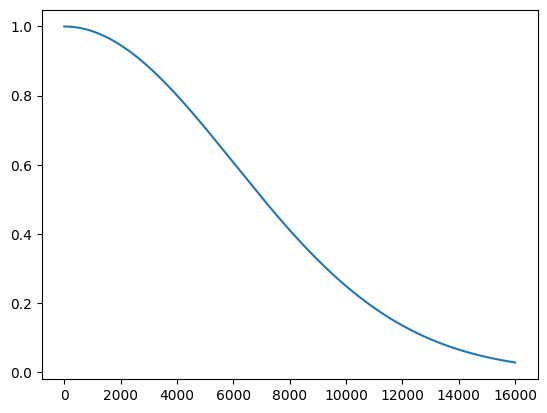

In [23]:
# Plot a gaussian function
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 16000, 10000)
y = weights.gaussian(6000)(x)
plt.plot(x, y)